# Graia MNIST digits example

In [1]:
# %pip install numpy
# %pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt

# to get the MNIST digits
# %pip install tensorflow
import tensorflow as tf
import tensorflow.keras

2024-03-23 11:15:35.758004: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-23 11:15:35.761325: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-23 11:15:35.793314: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-23 11:15:36.530956: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Graia
# %pip install pyopencl
# %pip install pocl-binary-distribution
# %pip install futhark-ffi
from graia import Graia


🌄 Graia v0.0.1

Graia initializing…
Graia ready.



In [3]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# print(train_labels[0])
# plt.imshow(train_images[0])

In [4]:
N = 60000
train_images = train_images[:N]
train_labels = train_labels[:N]
train_images = train_images.reshape(N, 28*28)

In [5]:
model = Graia(inputs=28*28, layer_nodes=128, layers=3, outputs=10)

(128, 784)  ->  (2, 128, 128)  ->  (10, 128)
Graia model with 134400 random parameters instantiated.


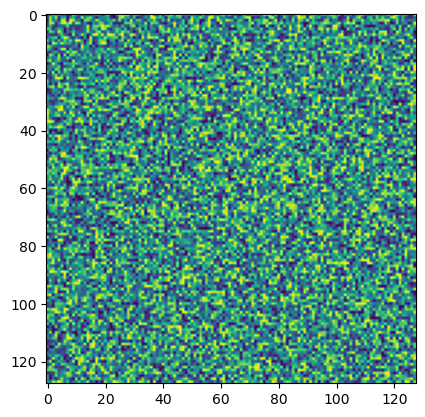

In [6]:
plt.imshow(model.hidden_weights[0])

Epoch 1/1: correct = 5547


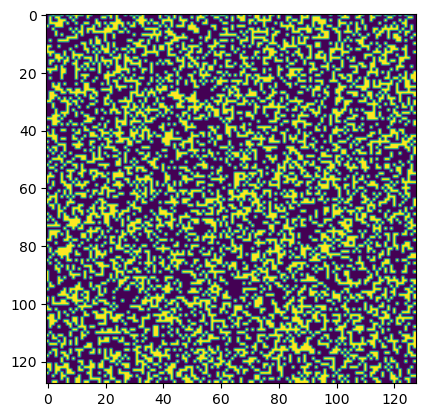

In [7]:
model.fit(train_images, train_labels, epochs=1)
plt.imshow(model.hidden_weights[0])

Epoch 1/1: correct = 5923


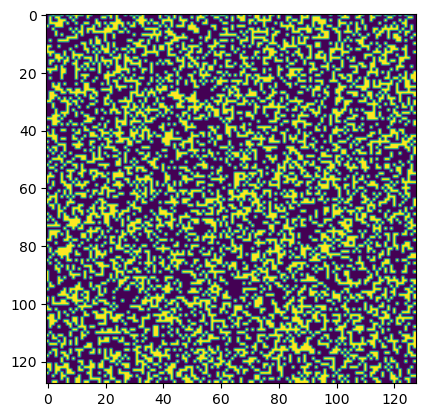

In [8]:
model.fit(train_images, train_labels, epochs=1)
plt.imshow(model.hidden_weights[0])

Epoch 1/1: correct = 5923


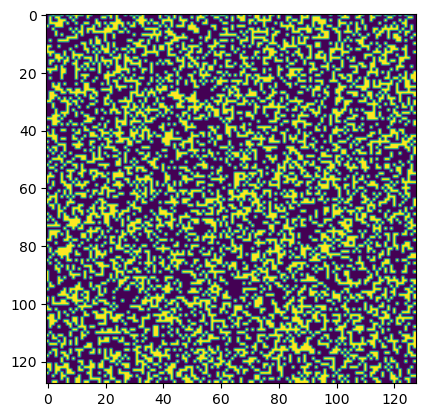

In [9]:
model.fit(train_images, train_labels, epochs=1)
plt.imshow(model.hidden_weights[0])